# 素数判定あれこれ

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
from decimal import *
getcontext()
import random

## 素朴な素数判定

In [2]:
def is_prime(num):
    for k in range(2, int(math.sqrt(num))+1):
        if num%k == 0:
            return False
            break
    else: return True

## フェルマー法

In [3]:
def fermat(num):
    num = abs(num)
    if num == 2:
        return True
    elif num < 2 or num%2 == 0:
        return False
    else:
        return pow(2, num-1, num) == 1

In [4]:
fermat((2**20)*13+1)

True

## ミラー・ラビン法

In [5]:
def miller_rabin(k,init):
    num = (2**k)*init+1
    a = random.randrange(num-2)+1
    if pow(a, init, num) ==1: #(a**init)%num == 1:
        return True
    else:
        for r in range(k):
            b = (2**r)*init
            if pow(a, b, num) == num-1: #(a**b)%num == num-1:
                return True
                break
        else: 
            return False

In [6]:
k=20
init=13
num = (2**k)*init+1
print(num)

print(miller_rabin(k,init),is_prime(num))

13631489
True True


In [ ]:
init=13
%timeit [is_prime((2**k)*init+1) for k in range(1,100)]
%timeit [fermat((2**k)*init+1) for k in range(1,100)]
%timeit [miller_rabin(k,init) for k in range(1,100)]

# 大竹先生の問題

任意の奇素数 $p$ に対し、$p-1$ は偶数であり、$k \in \mathbb{N}$ と奇数 $M$ が存在して、
$$ p-1 = 2^{k}M $$
と分解される。

この逆を考える。
つまり、以下の問題を考える。

>**問題.** すべての奇数 $M$ に対し、$2^{k}*M + 1$ が素数となるような $k \in \mathbb{N}$ が存在するか?

https://ja.wikipedia.org/wiki/シェルピンスキー数

In [7]:
init = 2*80-1
N = 10**2

count=0
num = init
while not is_prime(num+1):
    count += 1
    if count > N:
        print("Count Limit")
        break
    num *= 2
else:
    print("{}=2^{}*{}+1".format(num+1, count, init))

10177=2^6*159+1


## グラフ表示

In [20]:
def get_k(odd, Limit = 10**3):
    count = 0
    num = odd
    while not fermat(num+1): #is_prime(num+1):
        count += 1
        if count > Limit:
            return -1
            break
        num *= 2
    else:
        return count

In [21]:
def get_k_mr(odd, Limit = 10**3):
    count = 0
    while not miller_rabin(count, odd):
        count += 1
        if count > Limit:
            return -1
            break
    else:
        return count

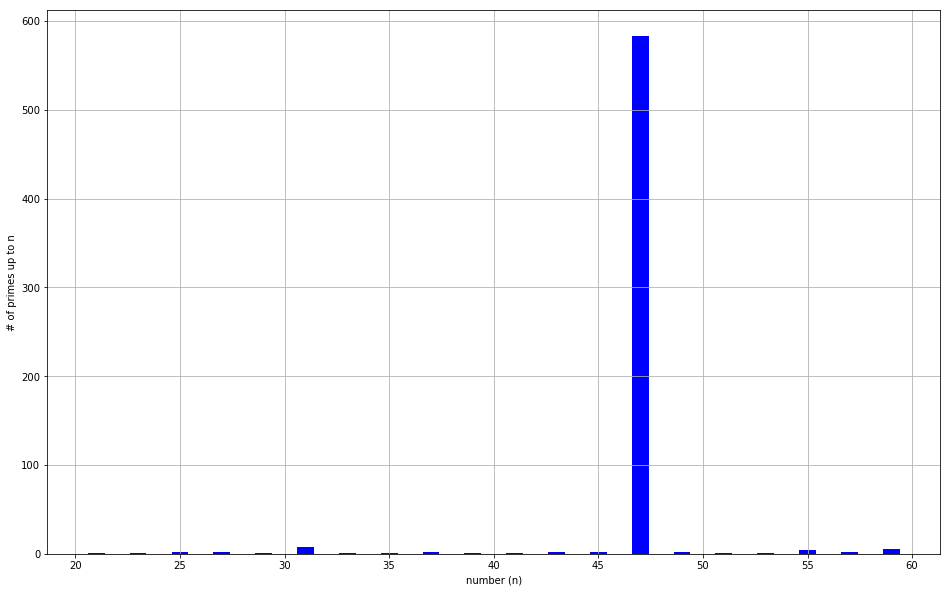

In [31]:
X = [2*k-1 for k in range(1,10**4)][10:30]
Y = [get_k_mr(odd) for odd in X] #[get_k(odd) for odd in X]

# Make the plot
plt.figure(figsize=(16,10))

ax = plt.subplot()
ax.grid()
ax.set(xlabel='number (n)', ylabel='# of primes up to n')

plt.bar(X, Y, color='blue')
#plt.xticks(X)
plt.show()

In [33]:
get_k_mr(47)

583

In [39]:
print((2**583)*47+1)
miller_rabin(583,47)

1487939695262196876907983166454197495251350196192890428923003345454869706240895712896623468784438158657419591298913094265537812046389415279164757669092989298186306341246574002177


True

## 改良

In [72]:
def get_k_hybrid(odd, Limit = 10**3):
    count = 0
    num = odd
    num_is_prime = False
    while not num_is_prime:
        count += 1
        if count > Limit:
            return -1
            break
        num = (2**count)*odd + 1
        if fermat(num):
            num_is_prime = miller_rabin(count, odd)
    else:
        return count

In [82]:
for n in range(600,700):
    odd = 2*n+1
    print("{} |-> {}".format(odd, get_k_hybrid(odd)))

1201 |-> 960
1203 |-> 2
1205 |-> 1
1207 |-> 6
1209 |-> 6
1211 |-> 1
1213 |-> 32
1215 |-> 2
1217 |-> 7
1219 |-> 2
1221 |-> 3
1223 |-> 1
1225 |-> 6
1227 |-> 2
1229 |-> 1
1231 |-> 4
1233 |-> 1
1235 |-> 5
1237 |-> 4
1239 |-> 2
1241 |-> 3
1243 |-> 2
1245 |-> 5
1247 |-> 7
1249 |-> 14
1251 |-> 1
1253 |-> 17
1255 |-> 2
1257 |-> 4
1259 |-> 5
1261 |-> 4
1263 |-> 6
1265 |-> 1
1267 |-> 12
1269 |-> 1
1271 |-> 1
1273 |-> 4
1275 |-> 1
1277 |-> 143
1279 |-> 22
1281 |-> 5
1283 |-> 5
1285 |-> 6
1287 |-> 4
1289 |-> 1
1291 |-> 12
1293 |-> 10
1295 |-> 1
1297 |-> 2
1299 |-> 2
1301 |-> 11
1303 |-> 4
1305 |-> 5
1307 |-> 3
1309 |-> 2
1311 |-> 5
1313 |-> 5
1315 |-> 2
1317 |-> 8
1319 |-> 5
1321 |-> 12
1323 |-> 1
1325 |-> 3
1327 |-> 2
1329 |-> 1
1331 |-> 1
1333 |-> 2
1335 |-> 1
1337 |-> 15
1339 |-> 10
1341 |-> 1
1343 |-> 1
1345 |-> 2
1347 |-> 6
1349 |-> 1
1351 |-> 4
1353 |-> 1
1355 |-> 1
1357 |-> 4
1359 |-> 1
1361 |-> 3
1363 |-> 16
1365 |-> 1
1367 |-> 3
1369 |-> 2
1371 |-> 4
1373 |-> 45
1375 |-> 2
1377 |-> 6
1379

In [74]:
num = (2**3)*161+1
print(num)
is_prime(num)

1289


True

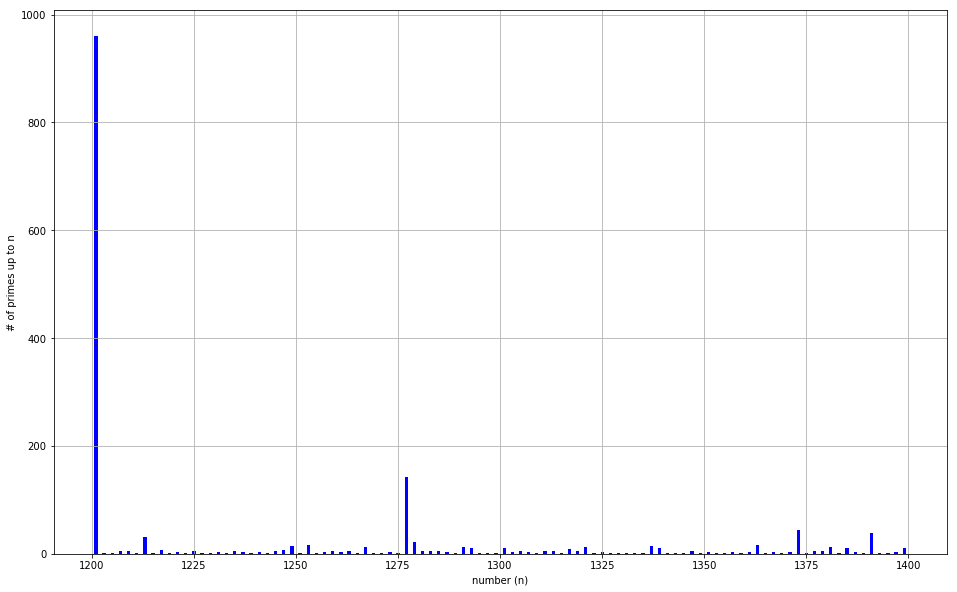

In [81]:
X = [2*k-1 for k in range(1,10**4)][600:700] #[1:1000]
Y = [get_k_hybrid(odd) for odd in X] #[get_k(odd) for odd in X]

# Make the plot
plt.figure(figsize=(16,10))

ax = plt.subplot()
ax.grid()
ax.set(xlabel='number (n)', ylabel='# of primes up to n')

plt.bar(X, Y, color='blue')
#plt.xticks(X)
plt.show()